In [1]:
#modul de carrega i de neteja de les dades, comú des de la primera pràctica

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#per realitzar les grafiques de regrassió ha estat necessari ampliar els chunks k

plt.rcParams["agg.path.chunksize"]=10000

# load dataset
#names = ['AirTime', 'Distance']
dataframe = pd.read_csv("DelayedFlights.csv")
#, names=names)
dataframe.dropna(inplace = True)
msk = np.random.rand(len(dataframe)) < 0.001

df = dataframe[msk]


#en la pràctica inicial es demanar carregar sols uns columnes en concret per poder analitzar, en base comentaris
#carrego totes les columnes
#df=DelayFligths_df[["Data","DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay","DepTime","ArrTime","CancellationCode"]]

#millorat el procés de neteja / analisi de la qualitat en les dades
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())

df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())

df["AirTime"] = df['AirTime'].fillna(df['AirTime'].mean())
df["Distance"] = df['Distance'].fillna(df['Distance'].mean())


missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


df.dropna(inplace = True)

#esborren totes les files que segueixin contenint algun null, tot i la perdua dinformació
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


# transformar dades categoriques

factorizables_mapping = {}
factorizable_names = ['UniqueCarrier', 'Origin', 'Dest']
for fact_name in factorizable_names:
    df[fact_name], factorizables_mapping[fact_name] = pd.factorize(df[fact_name])
#Estudi Correlació de variables
corrMatrix = df.corr()
print (corrMatrix)


                   Unnamed: 0  Year     Month  DayofMonth  DayOfWeek  \
Unnamed: 0           1.000000   NaN  0.996298    0.097585   0.038930   
Year                      NaN   NaN       NaN         NaN        NaN   
Month                0.996298   NaN  1.000000    0.096601   0.036955   
DayofMonth           0.097585   NaN  0.096601    1.000000   0.021417   
DayOfWeek            0.038930   NaN  0.036955    0.021417   1.000000   
DepTime              0.003139   NaN  0.007231    0.021787   0.035504   
CRSDepTime          -0.003213   NaN  0.000983    0.014174   0.042929   
ArrTime              0.029660   NaN  0.027518    0.068701   0.044475   
CRSArrTime           0.009761   NaN  0.009618    0.033800   0.046269   
UniqueCarrier        0.095043   NaN  0.017958    0.046122   0.009772   
FlightNum           -0.025586   NaN -0.008203   -0.023248  -0.055174   
ActualElapsedTime   -0.014105   NaN -0.036222    0.038874   0.024314   
CRSElapsedTime      -0.013486   NaN -0.035485    0.034624   0.01

<ipython-input-1-a0590889b267>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())
<ipython-input-1-a0590889b267>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())
<ipython-input-1-a0590889b267>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [2]:
#Estudiem el calcul MSE i al R2
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math
#regressió lineal, es calcula la relació entre la variable Arrdelay depenent del  temps de vol 
#df2_x = pd.DataFrame(np.c_[df['AirTime']], columns = ['AirTime'])

df2_x = pd.DataFrame(df.AirTime)

df2_y = pd.DataFrame(df.Distance)

x_train, x_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.33, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


#R2 i MSE de la regrecció lineal
#prediccióamb les dades de train
y_train_pred = lin_reg.predict(x_train)

#predicció amb les dades de test
y_test_pred = lin_reg.predict(x_test)

# AVALUANT AMB LES DADES DE TRAIN
# calculant manualment diferències entre les dades de train originals i les realitzaces en predicció

d = y_train - y_train_pred
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(np.sum(d**2)/np.sum((y_train-np.mean(y_train))**2))

print("Result del calcul manual Regressió lineal AIR TIME - DISTANCE :")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

#
# Calculant amb les funcions 
#
print('MSE conjunt train: %.3f' % (mean_squared_error(y_train, y_train_pred)))
#
# R-Squared
#
print('R^2 conjunt train: %.3f' % (r2_score(y_train, y_train_pred)))


# AVALUANT AMB LES DADES DE test
print("Result del calcul  TEST regressió lineal:")
#
# Calculant amb les funcions 
#
print('MSE conjunt test: %.3f' % (mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 conjunt test: %.3f' % (r2_score(y_test, y_test_pred)))




Result del calcul manual Regressió lineal AIR TIME - DISTANCE :
MAE: Distance    75.722209
dtype: float64
MSE: Distance    11216.884263
dtype: float64
RMSE: Distance    105.909793
dtype: float64
R-Squared: Distance    0.96162
dtype: float64
MSE conjunt train: 11216.884
R^2 conjunt train: 0.962
Result del calcul  TEST regressió lineal:
MSE conjunt test: 9965.516
R^2 conjunt test: 0.968


C:\Users\mcarm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-3-61e192a55fe5>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


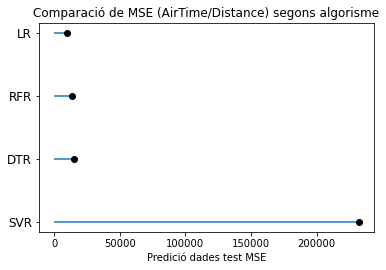

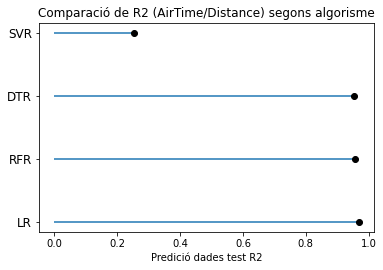

In [3]:
# EXERCICI 2, calculem els 3 models de regressió i després valorem segons MSE i al R2
# amb dades molt correlacionades AirTime i Distance
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# preparem els models a analitzar, per cada un guardem el MSE i el R2
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor(random_state=0)))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))


results1 = []
results2 = []
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
          
    model.fit(x_train, y_train)

    #predicció amb les dades de test
    y_test_pred = model.predict(x_test)

    results1.append(mean_squared_error(y_test, y_test_pred))
    results2.append(r2_score(y_test, y_test_pred))
    results.append(model.score)
    names.append(name)
    
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

# boxplot algorithm comparison
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
#plt.show()


resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results1
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de MSE (AirTime/Distance) segons algorisme'),
ax.set_xlabel('Predició dades test MSE');



resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results2
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de R2 (AirTime/Distance) segons algorisme'),
ax.set_xlabel('Predició dades test R2');




In [4]:
#al ser dades correlacionades, algorisme amb més exit és LR i menys SVR que dona uns valors totalment desproporcionat
#un 95% de R2 (pel LR) és un bon model

-0.002319036746384562
-0.062401898643129394
-0.18502520969723135
-0.06725133020370877


C:\Users\mcarm\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-5-0f6d76348e92>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


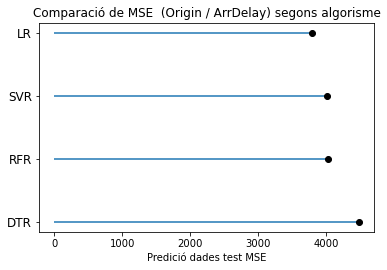

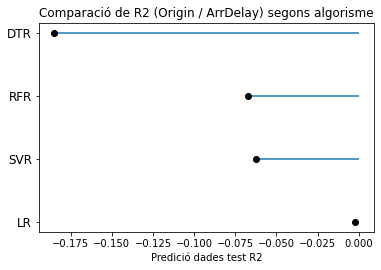

In [5]:
df2_x = pd.DataFrame(df.Origin)

df2_y = pd.DataFrame(df.ArrDelay)

x_train, x_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.33, random_state=42)


import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# preparem els models a analitzar, per cada un guardem el MSE i el R2
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor(random_state=0)))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))


results1 = []
results2 = []
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
          
    model.fit(x_train, y_train)

    #predicció amb les dades de test
    y_test_pred = model.predict(x_test)

    results1.append(mean_squared_error(y_test, y_test_pred))
    print(r2_score(y_test, y_test_pred))
    results2.append(r2_score(y_test, y_test_pred))
    results.append(model.score)
    names.append(name)
    



resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results1
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de MSE  (Origin / ArrDelay) segons algorisme'),
ax.set_xlabel('Predició dades test MSE');



resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results2
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de R2 (Origin / ArrDelay) segons algorisme'),
ax.set_xlabel('Predició dades test R2');



In [6]:
#R2 negatiu indica que el model és dolent, practicament no hi ha relació entre les variables i les predicions són dolentes